### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [5]:
PATH_FILE_ORDER = './file/olist_orders_dataset.csv'
PATH_FILE_ORDER_ITEM = './file/olist_order_items_dataset.csv'
PATH_FILE_ORDER_REVIEW = './file/olist_order_reviews_dataset.csv'
PATH_FILE_ORDER_PAYMENT = './file/olist_order_payments_dataset.csv'

PATH_FILE_PROD = './file/olist_products_dataset.csv'
PATH_FILE_SELLER = './file/olist_sellers_dataset.csv'
PATH_FILE_CUSTOMER = './file/olist_customers_dataset.csv'
PATH_FILE_GEOLOCATION = './file/olist_geolocation_dataset.csv'
PATH_FILE_PROD_CATEGORY_TRANSLATE = './file/product_category_name_translation.csv'

# Reviews Data

### Constants

In [37]:

# Original columns
COL_REV_ID = 'review_id'
COL_REV_MSG = 'review_comment_message'
COL_REV_ORDER = 'order_id'
COL_REV_SCORE = 'review_score'
COL_REV_TITLE = 'review_comment_title'
COL_REV_ANSWER = 'review_answer_timestamp'
COL_REV_CREATION = 'review_creation_date'

# Custom Columns
COL_REV_CUS_MSG_LEN = 'review_custom_msg_length'

### Build Dataframe

In [35]:
# Import file
reviewsDF = pd.read_csv(PATH_FILE_ORDER_REVIEW)

# Handle NaN values
reviewsDF.loc[reviewsDF[COL_REV_MSG].isnull(), COL_REV_MSG] = ''
reviewsDF.loc[reviewsDF[COL_REV_TITLE].isnull(), COL_REV_TITLE] = ''

# Compute review lengths
reviewsDF[COL_REV_CUS_MSG_LEN] = reviewsDF[COL_REV_MSG].apply(lambda msg: len(msg))

# Show DF statistics
reviewsCount = reviewsDF.shape[0]
noMsgReviewsCount = reviewsDF.loc[reviewsDF[COL_REV_CUS_MSG_LEN] == 0].shape[0]
noMsgReviewsRatio = round(noMsgReviewsCount / reviewsCount * 100, 2)

orderBy = [COL_REV_SCORE, COL_REV_CUS_MSG_LEN, COL_REV_CREATION, COL_REV_MSG, COL_REV_TITLE]
columns = [COL_REV_SCORE, COL_REV_CUS_MSG_LEN, COL_REV_MSG, COL_REV_TITLE]
reviewsDF = reviewsDF.sort_values(by=orderBy, ascending=False)
# reviewsDF[columns].head()

# plt.figure(figsize=(14, 10), dpi=80)
# plt.plot(reviewsDF[COL_REV_CUS_MSG_LEN].values, reviewsDF[COL_REV_SCORE].values, '-.')
# plt.show()

,review_custom_msg_length
review_score,
1,79.138978
2,67.634930
3,37.669965
4,19.642083
5,18.770376


### Statistics

In [36]:
print(f'Reviews: {reviewsCount}')
print(f'Empty message reviews: {noMsgReviewsCount} / {reviewsCount} ({noMsgReviewsRatio}%)')

scoreValues = sorted(reviewsDF[COL_REV_SCORE].unique())
for score in scoreValues:

    scoredDF = reviewsDF.loc[reviewsDF[COL_REV_SCORE] == score]

    scoredCount = scoredDF.shape[0]
    scoredRatio = round(scoredCount / reviewsCount * 100, 2)
    noMsgScoredCount = scoredDF.loc[reviewsDF[COL_REV_CUS_MSG_LEN] == 0].shape[0]
    noMsgScoredRation = round(noMsgScoredCount / scoredCount * 100, 2)

    print(f'{score} Score: {scoredCount} / {reviewsCount} ({scoredRatio}%)')
    print(f'\tNo message: {noMsgScoredCount} / {scoredCount} ({noMsgScoredRation}%)')

reviewsDF.groupby(by=COL_REV_SCORE).mean()

Reviews: 100000
Empty message reviews: 58247 / 100000 (58.25%)
1 Score: 11858 / 100000 (11.86%)
	No message: 2679 / 11858 (22.59%)
2 Score: 3235 / 100000 (3.23%)
	No message: 1006 / 3235 (31.1%)
3 Score: 8287 / 100000 (8.29%)
	No message: 4622 / 8287 (55.77%)
4 Score: 19200 / 100000 (19.2%)
	No message: 13166 / 19200 (68.57%)
5 Score: 57420 / 100000 (57.42%)
	No message: 36774 / 57420 (64.04%)


,review_custom_msg_length
review_score,
1,79.138978
2,67.634930
3,37.669965
4,19.642083
5,18.770376


## Plots

### Histogram

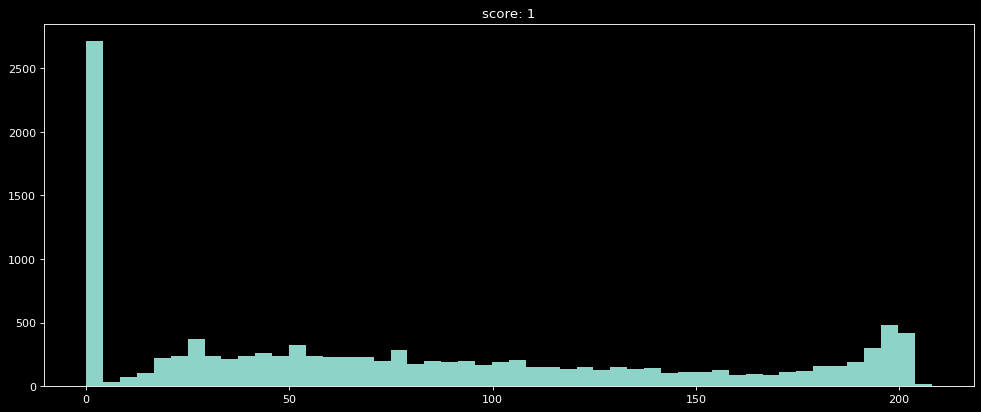

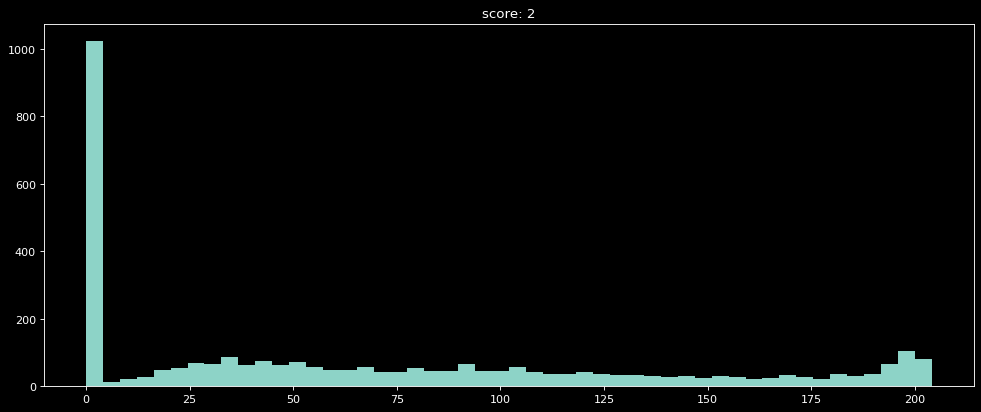

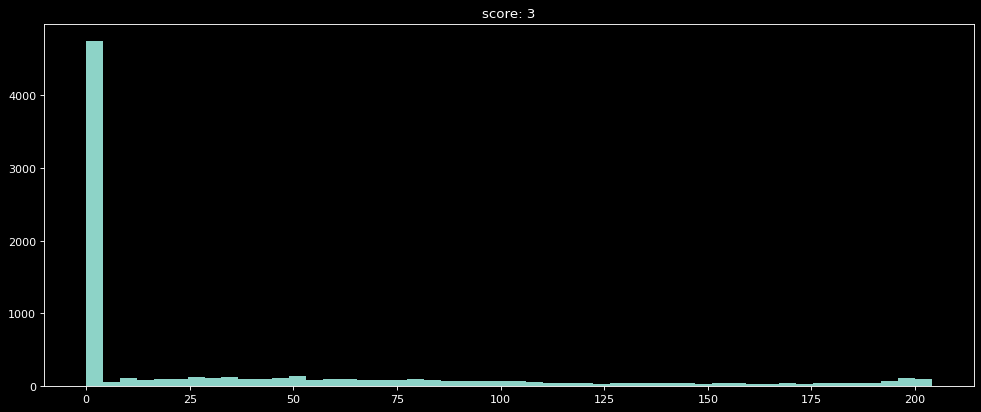

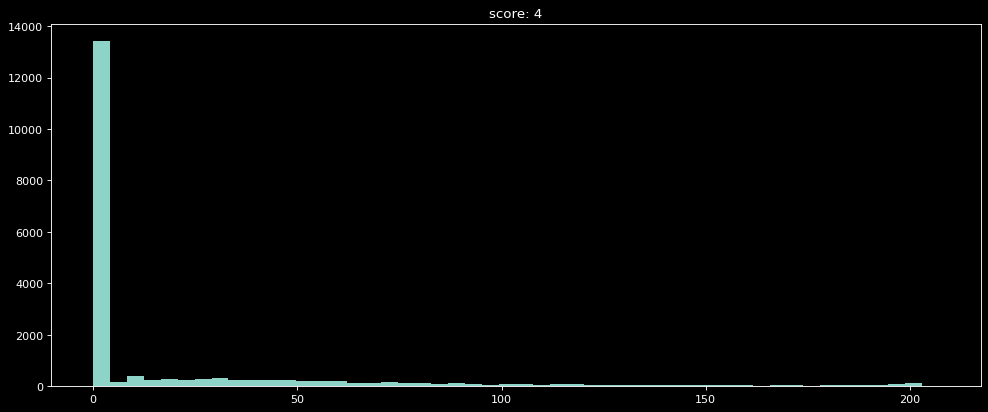

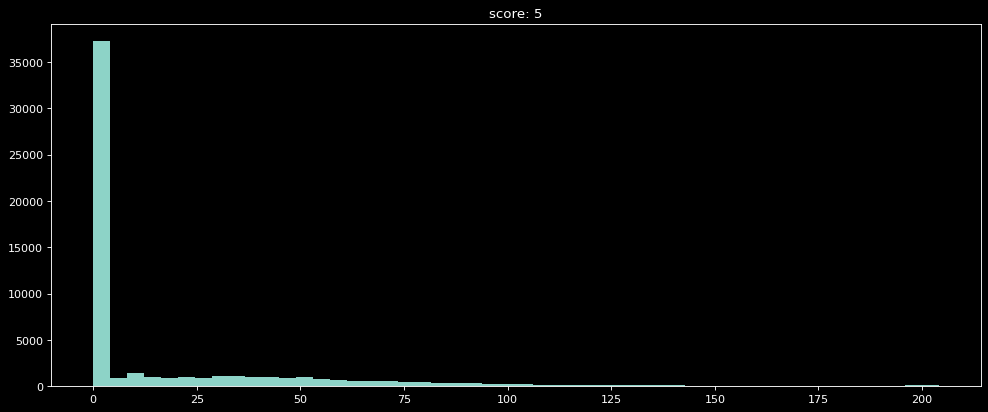

In [33]:
# score1Reviews = reviewsDF[reviewsDF[COL_REV_SCORE] == 1]
# score2Reviews = reviewsDF[reviewsDF[COL_REV_SCORE] == 2]
# score3Reviews = reviewsDF[reviewsDF[COL_REV_SCORE] == 3]
# score4Reviews = reviewsDF[reviewsDF[COL_REV_SCORE] == 4]
# score5Reviews = reviewsDF[reviewsDF[COL_REV_SCORE] == 5]
# # score1Reviews[COL_REV_CUS_MSG_LEN].values

for i in range(1, 6):
    plt.figure(figsize=(15, 6), dpi=80)
    plt.hist(reviewsDF[reviewsDF[COL_REV_SCORE] == i][COL_REV_CUS_MSG_LEN].values, bins=50)
    plt.title('score: ' + str(i))
    plt.show()

### Scatter Plot

In [ ]:
colorMap = { 0:'r', 1:'m', 2:'y', 3:'g', 4:'b', 5:'c' }
colours = [colorMap.get(reviewsDF.iloc[i][COL_REV_SCORE]) for i in range(reviewsDF.shape[0])]

plt.figure(figsize=(14, 10), dpi=80)

plt.scatter(reviewsDF[COL_REV_CUS_MSG_LEN].values, reviewsDF[COL_REV_SCORE].values, c=colours)
plt.xlabel('message length')
plt.ylabel('score')

# Clients Data

Text(0, 0.5, 'y')

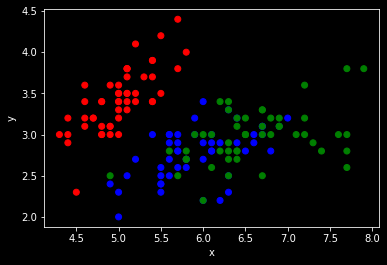

In [2]:
import seaborn as sns

# -*- coding: utf-8 -*-
"""
Created on Tue Mar  5 16:20:50 2019

@author: Michel Bessani
"""

import matplotlib.pyplot as plt
import numpy as np

plt.close('all')

# =============================================================================
# Diagrama de Dispersão
# =============================================================================

from sklearn import datasets
iris = datasets.load_iris()


# # Descrição do conjunto de Dados.
# print(iris.DESCR)


x = iris.data[:,0]
y = iris.data[:,1]



# # dispersao de 2 variaveis
# plt.figure()  
# plt.scatter(x,y)
# plt.xlabel('x')
# plt.ylabel('y')


# z = iris.data[:,2]

# # dispersao de 3 variaveis
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')


# #Utilizando cores para as classes

iris_class = iris.target
c_dict = {0:'r', 1:'b', 2:'g'}
colours = [c_dict[x] for x in iris_class]  # lista de cores para observacao


# dispersao de 2 variaveis com as cores
plt.figure()
plt.scatter(x,y,c=colours)
plt.xlabel('x')
plt.ylabel('y')

# dispersao de 3 variaveis com as cores
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z, c=colours)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')